Loading Necessary Modules

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Loading Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/MilanBinsMathew/Robot_Grasping_Robustness_Prediction/main/shadow_robot_dataset.csv'

dataset = pd.read_csv(url)
dataset.head()



,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,-0.032352,0.127232,0.040447,-0.058297,-0.011933,-0.138550,0.053953,-7.091730,0.338437,21.305433,0.544194,0.109246,0.042166,0.041517,0.439459,-13.975613,0.177114,5.456443,1.493776
1,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,-0.027381,0.273711,-0.007811,-0.059174,0.048517,-0.129178,0.010836,-10.479467,0.325636,34.575826,0.804912,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.176817,5.130892,1.493497
2,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,-0.025808,0.184343,-0.024433,-0.057710,0.099157,-0.143311,0.003063,-10.756263,0.315799,31.028958,0.867840,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.174343,5.650662,1.523433
3,85.758903,0.137684,6.504519,1.256002,0.304333,-16.948796,-0.027398,0.121100,-0.009160,-0.056178,0.081461,-0.158807,0.026105,-9.433894,0.324489,27.353780,0.744199,0.106332,-0.186364,0.068382,0.445833,-11.763374,0.180723,5.267410,1.455800
4,85.758903,0.161747,4.899113,0.999313,0.315815,-13.700695,-0.025698,0.079876,-0.026569,-0.057618,0.153013,-0.143695,0.003519,-10.523774,0.322725,32.159343,0.809915,0.104104,-0.216307,0.090358,0.438578,-15.347191,0.164628,6.339569,1.627478


Seperating Target & Features

Splitting the dataset into Test and Training (1:4)

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Y'], axis = 1).values
Y = dataset['Y'].values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import LogCosh
from tensorflow.keras.regularizers import l2


In [ ]:
model = Sequential([
                    Dense(32, activation = 'relu', input_shape = (24,)),
                    BatchNormalization(),
                    Dense(32, activation ='relu'),
                    Dense(64, activation ='relu'),
                    Dropout(0.2),
                    Dense(64, activation ='relu'),
                    Dropout(0.2),
                    Dense(32, activation ='relu'),
                    Dense(1)

])

opt = Adam(learning_rate = 0.0001)

model.compile(optimizer = opt, loss = 'logcosh')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                800       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                        

In [ ]:
history = model.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test), epochs = 120, batch_size = 32)

Epoch 1/120
63/63 [==============================] - 1s 6ms/step - loss: 77.7325 - val_loss: 78.8539
Epoch 2/120
63/63 [==============================] - 0s 4ms/step - loss: 76.8117 - val_loss: 77.4954
Epoch 3/120
63/63 [==============================] - 0s 3ms/step - loss: 74.7326 - val_loss: 74.1106
Epoch 4/120
63/63 [==============================] - 0s 3ms/step - loss: 69.3938 - val_loss: 65.5866
Epoch 5/120
63/63 [==============================] - 0s 4ms/step - loss: 56.9274 - val_loss: 47.0545
Epoch 6/120
63/63 [==============================] - 0s 3ms/step - loss: 39.0917 - val_loss: 28.4665
Epoch 7/120
63/63 [==============================] - 0s 4ms/step - loss: 27.8942 - val_loss: 19.0811
Epoch 8/120
63/63 [==============================] - 0s 3ms/step - loss: 22.6091 - val_loss: 17.6982
Epoch 9/120
63/63 [==============================] - 0s 3ms/step - loss: 22.1872 - val_loss: 17.2843
Epoch 10/120
63/63 [==============================] - 0s 3ms/step - loss: 21.6722 - val_los

Evaluating the Results

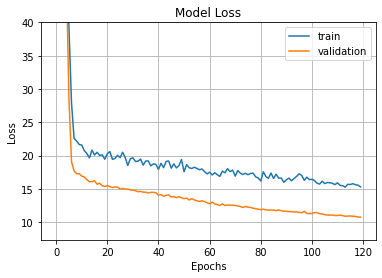

In [ ]:
fig1 = plt.gcf()
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.axis(ymax =40)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

R2 = r2_score(Y_test, model.predict(X_test))
print(" R2 Value: ",R2)

print(" RMSE Value: ",np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))
from sklearn.metrics import mean_absolute_error
print("MAE Value",mean_absolute_error(Y_test,model.predict(X_test)))


 R2 Value:  0.8507910040933148
 RMSE Value:  18.314021635178765
MAE Value 11.428231456273487


Predicted with the model.

In [ ]:

n = [[0.186883876,-0.000524833,0.005539393,0.442574702,-0.000716803,-0.008966561,0.004152505,0.00744863,-0.026981752,-0.001520734,0.0003761,0.257019216,-0.008807594,0.401765447,0.012797196,0.00048434,-0.03059054,-0.003435944,-0.004661834,0.416460727,-0.011355383,0.217100611,0.005279243,0.001981114]]
print(model.predict(n))



[[11.672127]]


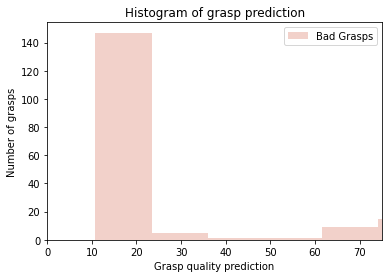

In [ ]:
itemindex = np.where(Y_test<=0.95*100)
best_grasps = X_test[itemindex[0]]
predictions = model.predict(X_test)
plt.hist(predictions,
         color='#D66751',
         alpha=0.3,
         label='Bad Grasps')
plt.axis(xmin=0,xmax=75)
plt.title('Histogram of grasp prediction')
plt.ylabel('Number of grasps')
plt.xlabel('Grasp quality prediction')
plt.legend(loc='upper right')

plt.show()

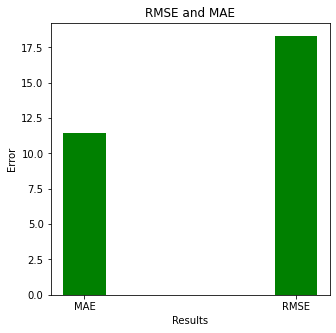

In [ ]:
data = {'MAE':11.428, 'RMSE':18.314}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.2)
 
plt.xlabel("Results")
plt.ylabel("Error")
plt.title("RMSE and MAE")
plt.show()